In [28]:
import pandas as pd
import numpy as np
import torch
from IPython.core.tests.test_inputtransformer2 import examples
from torch.onnx.symbolic_opset11 import unsqueeze
from tornado.escape import squeeze
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [29]:
if torch.cuda.is_available():
    print("CUDA is available!")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available.")

CUDA is available!
Number of GPUs: 1
GPU Name: NVIDIA GeForce GTX 1660 Ti with Max-Q Design


In [30]:
# 1. Create a 1D array of numbers from 0 to 9
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
# 2. Convert a numpy array to a torch tensor
tensor = torch.from_numpy(arr)
tensor

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
tensor = torch.tensor([1,2,3])
tensor + 10

tensor([11, 12, 13])

In [33]:
tensor * 10

tensor([10, 20, 30])

In [34]:
torch.mul(tensor, 10)

tensor([10, 20, 30])

Matrix multiplication has two elements
- Element wise multiplication (needs same dimension of the matrices) you use * for this operation
- Dot product (needs same number of rows in the first matrix and columns in the second matrix) you use matmul of the torch for this operation

In [35]:
tensor * tensor

tensor([1, 4, 9])

In [36]:
tensor.matmul(tensor)

tensor(14)

In [37]:
%%time
value = 0
for i in range(len(tensor)):
    value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 6.1 ms, sys: 0 ns, total: 6.1 ms
Wall time: 4.51 ms


In [38]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 875 μs, sys: 212 μs, total: 1.09 ms
Wall time: 915 μs


tensor(14)

In order to perform matrix multiplication
- The number of columns in the first matrix must be equal to the number of rows in the second matrix
- The result will have the same number of rows as the first matrix, and the same number of columns as the second matrix

You can use transpose or reshape in order to make the matrix multiplication in the case of the number of columns in the first matrix is not equal to the number of rows in the second matrix

In [39]:
#for example
tensor_A = torch.tensor([[1,2], [3,4], [5,6]])
tensor_B = torch.tensor([[7,8], [9,10]])
torch.mm(tensor_A, tensor_B)

tensor([[ 25,  28],
        [ 57,  64],
        [ 89, 100]])

When you try to apply torch.mean() make sure that tensor is not in long dtype otherwise you will get an error. there are other errors as well such as the tensor is empty.

when you add arg into the min and max will return the index of the min and max value in the tensor for example x.argmin() will return the index of the min value in the tensor x

## reshaping, resizing, stacking, and squeezing
- Reshaping is changing the number of rows and columns of the matrix
- Resizing is changing the size of the matrix
- Stacking is concatenating the two tensors has vstack and hstack which are vertical and horizontal stacking respectively
- Squeezing is removing the dimension of the tensor
- Unsqueeze is adding the dimension of the tensor
- View is changing the shape of the tensor, but it will not change the data of the tensor (keeps the same memory as the original tensor)
- Permute is changing the order of the tensor
- Transpose is changing the order of the tensor
- Flatten is changing the tensor to 1D tensor
- Concatenate is concatenating the two tensors
- Split is splitting the tensor into the number of chunks
- Chunk is splitting the tensor into the number of chunks

In [40]:
x = torch.arange(0,10)
x, x.shape

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), torch.Size([10]))

In [41]:
x_reshaped = x.reshape(2,5) # shape needs to match the original ones
x_reshaped, x_reshaped.shape

(tensor([[0, 1, 2, 3, 4],
         [5, 6, 7, 8, 9]]),
 torch.Size([2, 5]))

In [42]:
#change the view
z = x.view(2,5)
z.shape, x.shape

(torch.Size([2, 5]), torch.Size([10]))

In [43]:
x_stacked = torch.stack((x, x), dim=1)
x_stacked

tensor([[0, 0],
        [1, 1],
        [2, 2],
        [3, 3],
        [4, 4],
        [5, 5],
        [6, 6],
        [7, 7],
        [8, 8],
        [9, 9]])

In [44]:
#torch squeeze
x_reshaped.shape

torch.Size([2, 5])

In [45]:
x_reshaped.squeeze().shape

torch.Size([2, 5])

Squeeze eliminates the dimension where it has only 1 element. If you want to eliminate a specific dimension you can pass the dimension as an argument to the squeeze function. For example, x_reshaped.squeeze(0) will eliminate the first dimension of the tensor x_reshaped

Meanwhile unsqueeze is used for the reversing the what squeeze does or sort of adds the dimension to the tensor. For example, x_reshaped.unsqueeze(0) will add the dimension to the tensor x_reshaped and this sort of helps in training since the model expects the input to have a specific dimension.

In [46]:
x_unsqueezed = x_reshaped.unsqueeze(dim=0)
x_unsqueezed

tensor([[[0, 1, 2, 3, 4],
         [5, 6, 7, 8, 9]]])

In [47]:
#torch permute it has args input and dims which is the order of the tensor
x_permuted = x_reshaped.permute(1,0)
x_permuted

tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])

torch permute is especially needed in the cases like computer vision where the color channel place is different in the tensor. For example, the color channel is in the first dimension in the pytorch but in the tensorflow, it is in the last dimension so with the help of permute color channel can be changed to the last dimension from the first one.

In [48]:
#indexing
indexing_tensor = torch.arange(1,10).reshape(1,3,3)
indexing_tensor[0,:,:]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Pytorch actually has a functionality which can interact with numpy. you do not need to convert the numpy array to tensor you can directly use the numpy array in the pytorch function. Or you can convert np array to an tensor with torch.from_numpy() function. And, from tensor to numpy you can use the tensor.numpy() function.

In [49]:
array = np.arange(1,10)
tensor = torch.from_numpy(array)
array, tensor

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]))

numpys default dtype is float64 but the default dtype of the torch is float32

warning: when converting from numpy to pytorch, pytorch reflects numpys default datatype of float64 unless specified otherwise.

- In general AI with deep learning or machine learning is to deal with data which are represented in numerical matrices and models mostly tries to get the patterns between these numbers and create a prediction based on these patterns. So, it is important to know how to manipulate these matrices in order to get the best results from the model.

- In short neural network learns like this:

    start with random numbers -> tensor operations -> update random numbers to try and make them better representations of the data -> repeat until the numbers are good representations of the data

In [50]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [51]:
torch.cuda.device_count()

1

In [52]:
torch.cuda.empty_cache()
torch.cuda.reset_peak_memory_stats()

In [53]:
tensor = torch.tensor([1,2,3], device=device)
print(tensor, tensor.device)

tensor([1, 2, 3], device='cuda:0') cuda:0


Note that numpy only works with the CPU, so if you want to use the GPU you need to convert the numpy array to a tensor and then move it to the GPU.

In [56]:
tensor_back_cpu = tensor.to("cpu")
tensor_back_cpu.device, tensor.device

(device(type='cpu'), device(type='cuda', index=0))

In [58]:
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.5.1+cu121'

In [60]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = X * weight + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [61]:
train_split = int(0.8 * len(X))
train_split

40

In [62]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

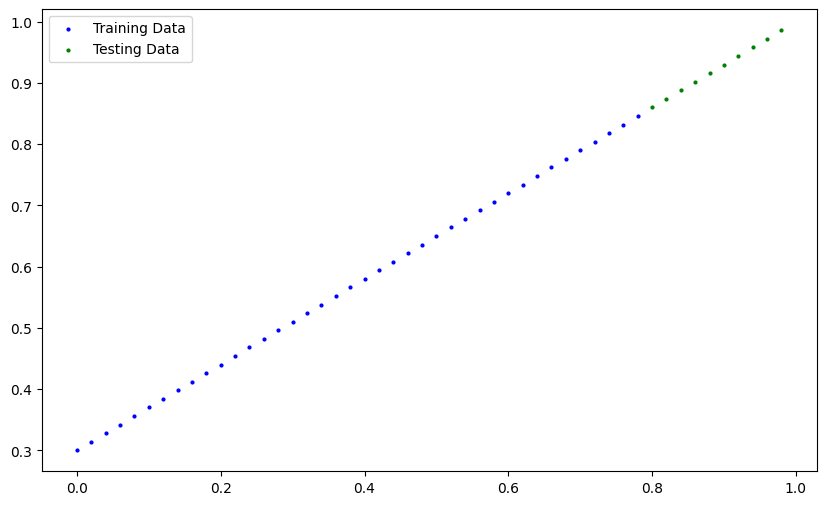

In [67]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10,6))
    plt.scatter(train_data, train_labels, c='b', s=4,label='Training Data')
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing Data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()
    plt.show()
plot_predictions()

In [73]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

Torch Parameter is a wrapper around a tensor that allows to be updated in the optimization process. It is a tensor subclass that registers it as a parameter of the module when assigned as an attribute. one of the main advantages of the parameter is that it is automatically added to the list of parameters when assigned as an attribute of the module.

### PyTorch essentials in deep learning

- torch.nn: a subpackage that contains modules and extensible classes for building neural networks.
- torch.nn.parameter: a class that sets the parameters of the neural network.
- torch.nn.Module: base class for all neural network modules. if you subclass it you should overwrite forward() method.
- torch.optim: a subpackage that contains modules and classes for optimizing the neural network.
- def forward(): method that defines the computation performed at every call.

#### PyTorch dataset loaders
- DataLoader: a class that provides an iterable over a dataset.
- Dataset: an abstract class that represents a dataset.
- TensorDataset: a class that represents a dataset that contains only tensors.
- these packages are imported with torch.utils.data

.parameters shows the parameters of your model it is an generator.

In [76]:
torch.manual_seed(42)

model_0 = LinearRegression()

list(model_0.parameters()), model_0.state_dict()

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [77]:
weight, bias

(0.7, 0.3)

theres is a method called torch.inference_mode which check models predictive power. When the data through the model its going to run it through the forward() method.

In [78]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [79]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

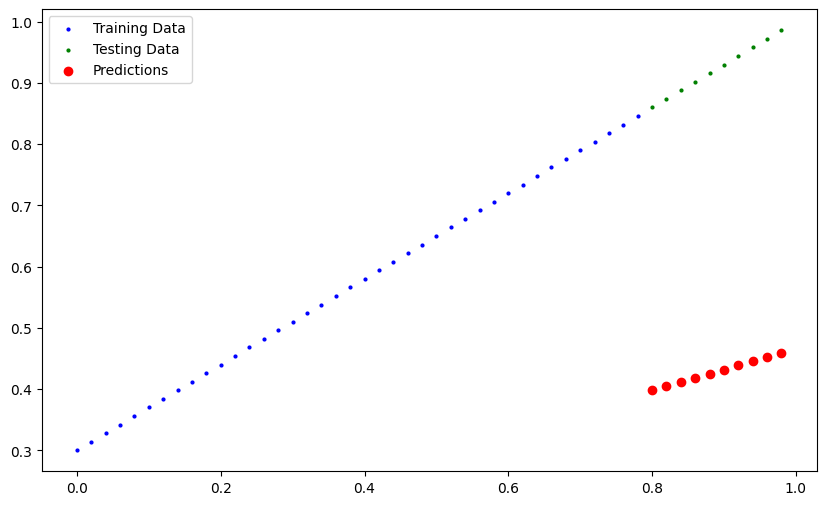

In [80]:
plot_predictions(predictions=y_preds)

It is good to mention that loss functions in pytorch has different names. for example, mean squared error is called MSELoss in pytorch and mean absolute error is called L1Loss in pytorch.

Loss = exam score (how well you performed on the exam)

Optimizer = study strategy (which will improve your score)

We need to underline the difference between the momentum and the learning rate as they are similar yet their purposes are different. The learning rate is the step size of the optimizer and the momentum is the acceleration of the optimizer. The momentum is used to speed up the optimization process and it is used to overcome the local minima. The momentum is used to avoid the oscillation in the optimization process.
- we can use a analogy here to understand the momentum and the learning rate by using running on a track example.
    - Learning rate is how big your steps are
    - Momentum is running downhill- your past speed helps you move forward more efficiently.

In [81]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

We need to underline the torch.zero_grad in every training loop we are going to use. It is used to zero the gradients of the model parameters. If you do not use this it will add app to the old gradients which will lead to incosistent loss computing hence wrong results in the end.

In [ ]:
for epoch in range(1):
    model_0.train() # train mode in pytorch sets all parameters that
                  # require gradients to require gradients.
    #forward pass
    y_pred = model_0(X_train)
    #calculate the loss
    loss = loss_fn(y_train, y_pred)
    #optimizer
    optimizer.zero_grad()
    #backward pass on the loss with respect to the model parameters
    loss.backward()
    #perform gradient descent
    optimizer.step()

    model_0.eval() # turns off gradient tracking

